In [34]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
alltrain_df = pd.read_csv('./all_train_nohash.csv')
alltest_df = pd.read_csv('./all_test_nohash.csv')

/usr/cac/rhel6/lsa/anaconda-vis-portal/latest/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (28,59,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/cac/rhel6/lsa/anaconda-vis-portal/latest/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (27,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
alltrain_df.iloc[:, (28,59,60,68)]

,RAIL,VIN_6,VIN_7,MCARR_ID
0,0000000,1,4,0
1,0000000,E,H,0
2,0000000,1,4,0
3,0000000,1,4,0
4,0000000,2,0,0
5,0000000,2,0,0
6,0000000,2,0,0
7,0000000,1,8,0
8,0000000,1,8,0
9,0000000,1,8,0


In [4]:
alltest_df.iloc[:, (27,66)]

,RAIL,MCARR_ID
0,0000000,00000000000
1,0000000,00000000000
2,0000000,00000000000
3,0000000,00000000000
4,0000000,00000000000
5,0000000,00000000000
6,0000000,00000000000
7,0000000,00000000000
8,0000000,00000000000
9,0000000,00000000000


In [5]:
print(alltrain_df.shape)
print(alltrain_df.columns.tolist())

(1357940, 149)
['Unnamed: 0', 'ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'YEAR', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'TWAY_ID', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR', 'STATE.y', 'VEH_NO.x', 'VE_FORMS.y', 'HARM_EV.y', 'MAN_COLL.y', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'VIN', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'TOW_VEH.x', 'J_KNIFE', 'MCARR_ID', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', '

In [6]:
print(alltest_df.shape)
print(alltest_df.columns.tolist())

(543015, 147)
['Unnamed: 0', 'ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'TWAY_ID', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS', 'STATE.y', 'VEH_NO.x', 'VE_FORMS.y', 'HARM_EV.y', 'MAN_COLL.y', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'VIN', 'VIN_1', 'VIN_2', 'VIN_3', 'VIN_4', 'VIN_5', 'VIN_6', 'VIN_7', 'VIN_8', 'VIN_9', 'VIN_10', 'VIN_11', 'VIN_12', 'TOW_VEH.x', 'J_KNIFE', 'MCARR_ID', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'P

In [7]:
drops = ["Unnamed: 0",
         "VE_FORMS.y","HARM_EV.y","MAN_COLL.y","RAIL","TWAY_ID",
         "CF1","CF2","CF3",
         "VIN","VIN_1","VIN_2","VIN_3","VIN_4","VIN_5","VIN_6","VIN_7","VIN_8",
         "VIN_9","VIN_10","VIN_11","VIN_12","MCARR_ID",
         "VEH_NO.y","COUNTY.y", "DAY.y","MONTH.y","HOUR.y","MINUTE.y","ROAD_FNC.y",
         "SCH_BUS.y","MAKE.y","MAK_MOD.y","BODY_TYP.y","MOD_YEAR.y",
         "TOW_VEH.y","SPEC_USE.y","EMER_USE.y","ROLLOVER.y","IMPACT1.y","FIRE_EXP.y",
         "CERT_NO"
        ]

In [8]:
for col in drops:
    del alltrain_df[col]

In [9]:
for col in drops:
    del alltest_df[col]

In [10]:
print(alltrain_df.shape)
print(alltrain_df.columns.tolist())

(1357940, 107)
['ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'YEAR', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'FATALS', 'DRUNK_DR', 'STATE.y', 'VEH_NO.x', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'TOW_VEH.x', 'J_KNIFE', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'PREV_ACC', 'PREV_SUS', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'FIRST_MO', 'FIRST_YR', 'LAST_MO', 'LAST_YR', 'DEATHS', 'STATE', 'VE_FORMS', 'PER_NO', 'HARM_EV', 'MAN_COLL', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 

In [11]:
print(alltest_df.shape)
print(alltest_df.columns.tolist())

(543015, 105)
['ID', 'STATE.x', 'VE_FORMS.x', 'PEDS', 'PERSONS', 'COUNTY.x', 'CITY', 'DAY.x', 'MONTH.x', 'DAY_WEEK', 'HOUR.x', 'MINUTE.x', 'NHS', 'ROAD_FNC.x', 'ROUTE', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR', 'HARM_EV.x', 'MAN_COLL.x', 'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS.x', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR', 'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'FATALS', 'STATE.y', 'VEH_NO.x', 'HIT_RUN', 'REG_STAT', 'OWNER', 'MAKE.x', 'MODEL', 'MAK_MOD.x', 'BODY_TYP.x', 'MOD_YEAR.x', 'TOW_VEH.x', 'J_KNIFE', 'GVWR', 'V_CONFIG', 'CARGO_BT', 'BUS_USE', 'SPEC_USE.x', 'EMER_USE.x', 'TRAV_SP', 'UNDERIDE', 'ROLLOVER.x', 'IMPACT1.x', 'DEFORMED', 'M_HARM', 'FIRE_EXP.x', 'DR_PRES', 'L_STATE', 'DR_ZIP', 'L_STATUS', 'CDL_STAT', 'L_ENDORS', 'L_COMPL', 'L_RESTRI', 'DR_HGT', 'DR_WGT', 'PREV_ACC', 'PREV_SUS', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'FIRST_MO', 'FIRST_YR', 'LAST_MO', 'LAST_YR', 'DEATHS', 'STATE', 'VE_FORMS', 'PER_NO', 'HARM_EV', 'MAN_COLL', 'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE

In [12]:
alltrain_df

,ID,STATE.x,VE_FORMS.x,PEDS,PERSONS,COUNTY.x,CITY,YEAR,DAY.x,MONTH.x,...,DEATH_MO,DEATH_HR,DEATH_MN,DEATH_TM,LAG_HRS,LAG_MINS,WORK_INJ,HISPANIC,RACE,LOCATION
0,0,1,1,0,1,21,0,2003,1,1,...,1,9,5,905,1,35,9,7,1,0
1,1,1,1,0,1,71,0,2003,1,1,...,1,16,44,1644,0,54,0,7,1,0
2,2,1,1,0,1,51,0,2003,5,1,...,1,13,35,1335,1,16,0,7,2,0
3,3,1,1,0,1,111,0,2003,4,1,...,1,8,25,825,0,35,0,1,1,0
4,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0
5,4,1,2,0,3,13,0,2003,1,1,...,1,19,30,1930,0,0,0,7,2,0
6,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0
7,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0
8,4,1,2,0,3,13,0,2003,1,1,...,1,19,30,1930,0,0,0,7,2,0
9,4,1,2,0,3,13,0,2003,1,1,...,0,0,0,0,999,99,8,0,0,0


In [13]:
print(alltrain_df.shape)
print(alltest_df.shape)

(1357940, 107)
(543015, 105)


In [14]:
train_x = alltrain_df.drop(['DRUNK_DR','YEAR'], axis=1)
train_y = alltrain_df['DRUNK_DR']
test_x = alltest_df

In [15]:
print(train_x.shape)
print(train_y.shape)

(1357940, 105)
(1357940,)


In [16]:
train_y.head()

0    False
1     True
2     True
3    False
4    False
Name: DRUNK_DR, dtype: bool

In [17]:
dic = {"False":0, "True":1}
train_y.replace({"DRUNK_DR": dic}, inplace=True)
train_y.head()

0    False
1     True
2     True
3    False
4    False
Name: DRUNK_DR, dtype: bool

In [18]:
train_y.astype(int)

0          0
1          1
2          1
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         1
12         1
13         1
14         1
15         1
16         1
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1357910    0
1357911    0
1357912    0
1357913    0
1357914    0
1357915    0
1357916    0
1357917    0
1357918    0
1357919    0
1357920    0
1357921    0
1357922    1
1357923    1
1357924    1
1357925    0
1357926    0
1357927    0
1357928    0
1357929    0
1357930    0
1357931    0
1357932    0
1357933    0
1357934    0
1357935    0
1357936    0
1357937    0
1357938    0
1357939    0
Name: DRUNK_DR, dtype: int64

In [19]:
trainX = train_x.as_matrix()
trainY = train_y.astype(int)
testX = test_x.as_matrix()

In [20]:
dtrain = xgb.DMatrix(trainX, label=trainY)
dtest = xgb.DMatrix(testX)

In [21]:
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'binary:logitraw'
# scale weight of positive examples
# param['scale_pos_weight'] = sum_wneg/sum_wpos
param['eta'] = 0.1
param['max_depth'] = 7
param['eval_metric'] = 'auc'
# param['silent'] = 1
# param['min_child_weight'] = 100
# param['subsample'] = 0.7
# param['colsample_bytree'] = 0.7
param['nthread'] = 8

In [22]:
evallist  = [(dtest,'eval'), (dtrain,'train')]

In [23]:
num_round = 10

In [24]:
bst = xgb.train(param, dtrain, num_round)

In [25]:
ypred = bst.predict(dtest)

In [26]:
ypred

array([-0.86874509, -0.76492077, -0.76492077, ..., -1.21906888,
       -1.16604125, -1.3043915 ], dtype=float32)

In [27]:
len(ypred)

543015

In [32]:
# Given a prediction, create a Kaggle submission file
submit = pd.DataFrame(data={'ID': alltest_df['ID'], 'DRUNK_DR': ypred})
submit

,DRUNK_DR,ID
0,-0.868745,0
1,-0.764921,1
2,-0.764921,1
3,-0.764921,1
4,-0.764921,1
5,-0.764921,1
6,-0.764921,1
7,-1.295268,2
8,-1.295268,2
9,-1.295268,2


In [41]:
# removing duplicates (there are still some)
submit_uniq = submit.drop_duplicates()
print(submit_uniq.shape)

(167599, 2)


In [42]:
submit_uniq

,DRUNK_DR,ID
0,-0.868745,0
1,-0.764921,1
7,-1.295268,2
10,-1.304392,3
11,-1.267524,3
12,-1.257015,4
13,-0.775434,5
14,-1.257015,6
26,-0.974797,7
30,-0.941282,8


In [47]:
# using groupby to select the first value
submit_uniq = submit.groupby('ID').first().reset_index()
print(submit_uniq.shape)
submit_uniq

(121065, 2)


,ID,DRUNK_DR
0,0,-0.868745
1,1,-0.764921
2,2,-1.295268
3,3,-1.304392
4,4,-1.257015
5,5,-0.775434
6,6,-1.257015
7,7,-0.974797
8,8,-0.941282
9,9,-0.484888


In [48]:
submit_uniq.to_csv('fars_submit_xgb001.csv', index = False)

In [39]:
%whos

Variable      Type         Data/Info
------------------------------------
alltest_df    DataFrame                ID  STATE.x  <...>43015 rows x 105 columns]
alltrain_df   DataFrame                 ID  STATE.x <...>57940 rows x 107 columns]
bst           Booster      <xgboost.core.Booster object at 0x2ab5f8292668>
col           str          CERT_NO
dic           dict         n=2
drops         list         n=42
dtest         DMatrix      <xgboost.core.DMatrix object at 0x2ab5f82926d8>
dtrain        DMatrix      <xgboost.core.DMatrix object at 0x2ab5f8292a90>
evallist      list         n=2
np            module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
num_round     int          10
param         dict         n=5
pd            module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
submit        DataFrame            DRUNK_DR      ID\<...>[543015 rows x 2 columns]
submit_uniq  

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

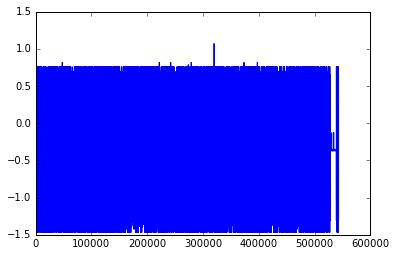

In [29]:
plt.plot(ypred)